# Skip-Entry Dynamics

Joe(y) Carpinelli  
2022-12-11

## Artemis 1

Go Artemis! NASA’s first Artemis mission launched successfully in the
earliest hours of November 16th, 2022. Artemis 1 was an uncrewed flight
*test* — the [Orion
spacecraft](https://www.nasa.gov/exploration/systems/orion/index.html)
flew to the moon, arrived in a special kind of stable orbit called a
[*Distant Retrograde
Orbit*](https://www.nasa.gov/feature/orion-will-go-the-distance-in-retrograde-orbit-during-artemis-i).
Of course, NASA’s flight operators in Mission Control captured [stunning
pictures](https://www.nasa.gov/content/artemis-1-images) along the way.
A visual overview for Artemis 1 is shown in
<a href="#fig-a1-arch" class="quarto-xref">Figure 1</a>.

Artemis 1 is [record
breaking](https://www.theverge.com/2022/11/29/23484571/artemis-1-halfway-record-distance)
through its furthest achieved distance from Earth, and through one of
its most important test objectives — the first [successfully
test](https://www.lockheedmartin.com/en-us/news/features/2022/orion-heat-shield.html)
of a skip-entry for a human-rated spacecraft. Orion’s heatshield was
tested successfully when it entered Earth atmosphere on December 11th,
2022.

<figure id="fig-a1-arch">
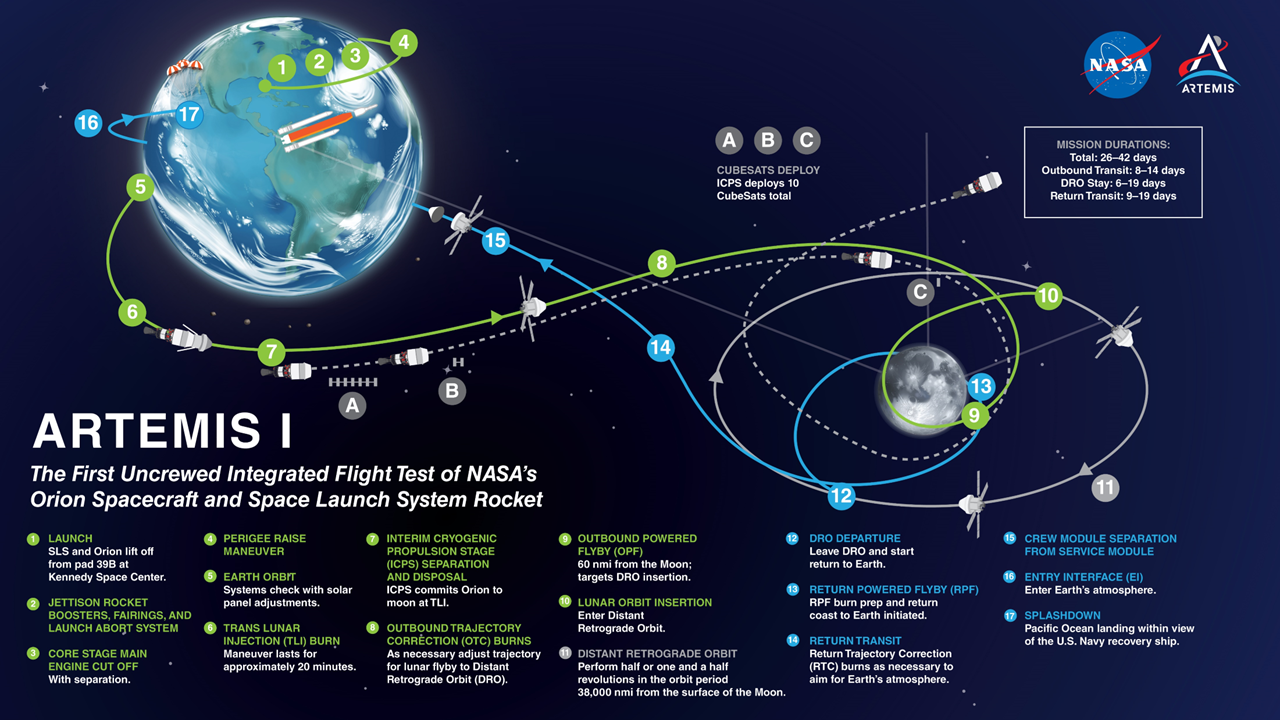
<figcaption>Figure 1: Artemis 1 Mission Architecture</figcaption>
</figure>

## Atmospheric Entry

Testing a new spacecraft’s capability to safely enter Earth’s atmosphere
is incredibly important. If a spacecraft is to return to Earth in-tact,
it has to survive the fall through Earth’s atmosphere. Returning
spacecraft are hurtling through space at tens of thousands of miles per
hour; as the spacecraft collide with air particles at high speeds, an
enormous amount of heat is generated. To withstand the heat of entering
a planet’s atmosphere from space, spacecraft commonly have a thick metal
component which is oriented towards the atmosphere for the duration of
the atmospheric entry. This metal hardware is referred to as a heat
shield. Artemis 2 will fly four astronauts to a lunar orbit before
returning back to Earth. A successful atmospheric entry in Artemis 1
will prove the Orion spacecraft capable of safely returning astronauts
back to Earth in Artemis 2, and future Artemis missions.

The *angle* of a spacecraft’s flight into Earth’s atmosphere (mostly)
determines the *kind* of atmospheric entry: ballistic, lifting, or
skipping. A steep entry will cause the spacecraft to *cannonball*
through Earth’s atmosphere; if we model this scenario while *ignoring
the force of gravity on the spacecraft*, the spacecraft’s trajectory is
*ballistic*. A slightly less steep entry will allow the atmosphere to
*lift* the spacecraft as it descends; this force exerted by the
atmosphere on the spacecraft is similar to how airplanes fly, and this
flavor of atmospheric entry is known as *lifting* entry. Finally,
entering the atmosphere at a shallow angle will cause the spacecraft to
*skip* across the atmosphere like a rock on a pond; this is known as a
*skipping* entry.

No human-rated vehicle as *ever* completed a skip-entry before
Artemis 1. Orion is the first! There are [many
benefits](https://www.lockheedmartin.com/en-us/news/features/2022/orion-skip-maneuver.html)
to skip-entries, including lower accelerations experienced by
astronauts, more precise landing targets, and lower temperatures on the
heat shield. While the benefits of skip-entries are real, all
atmospheric entries are incredibly sensitive. Enter the atmosphere at
too steep an angle, and the spacecraft will burn up in the atmosphere.
Enter the atmosphere at too shallow an angle, and the spacecraft will
skip too far and fly out into space, never to return. Rigorous
calculations must be made to ensure the spacecraft is entering the
atmosphere at the right angle, and the right speed. With a few
simplifying assumptions, the math behind atmospheric entry can be simple
enough to fit in a blog post! Don’t believe me? Read on!

## Entry Dynamics

We can simulate the Orion spacecraft’s trajectory through the atmosphere
with just a couple dozen lines of code! To build a semi-accurate model
for how a spacecraft enters Earth’s atmosphere, we’ll need to simplify
the problem by make some assumptions. For example, let’s completely
ignore winds! We should also ignore parachutes — we will just assume
parachutes deploy successfully at *some* altitude. Let’s pretend the
Orion spacecraft is completely rigid by ignoring the possibility of any
bending or flexing in the structure that could affect the aerodynamics
throughout entry. Also, we are leaving out all considerations related to
heat! No thermodynamic modeling in this post. We will assume the heat
shield is capable of handling any entry we throw at it.

> **Note**
>
> The word *model* might seem a bit abstract. What does a model look
> like? A model can be thought of as the combination of two things:
> simplifying assumptions, and equations which rely on the simplifying
> assumptions. So all we need to build a model is to list the
> assumptions we make, and use those assumptions to write equations.
> Hey! That’s only two things!

There are many other assumptions we’re making implicitly in this
problem. While we can’t possibly list them all, let’s go into some more
depth for a couple of the most important assumptions our model will rely
on.

### Exponential Atmosphere

Earth’s atmosphere will exert aerodynamic forces on the Orion
spacecraft. If we ignore wind, these aerodynamic forces will depend on
some aerodynamic coefficients, the spacecraft’s airspeed and
orientation, as well as the *density* of the atmosphere. This
atmospheric density will vary with altitude! We can create a *very*
simple model for Earth’s atmosphere by assuming the density decays
*exponentially* as altitude increases. The core equation for $\rho$, the
atmospheric density, will depend on altitude above sea level $h$, the
atmospheric density at sea level $\rho_0$, and a scaling factor $h_s$
which is unique to each planet. For Earth, an accurate scaling factor is
approximately equal to $7524$ meters.

<span id="eq-exp-atm">$$
\rho = \rho_0 e^\frac{-h}{h_s}
 \qquad(1)$$</span>

### Aerodynamic Coefficients

The aerodynamic forces on Orion can be summarized by a few aerodynamic
coefficients: the ballistic coefficient $\beta$, the coefficient of drag
$C_D$, and the lifting coefficient $C_L$. The coefficients of lift and
drag are commonly combined into one value: the *lift to drag ratio*
$C_R$. For this post, one value for Orion’s $C_R$ will be assumed. The
ballistic coefficient can be calculated using the vehicle’s mass, lift
to drag ratio, and the surface area of the heat shield, as shown in
<a href="#eq-ballistic-coeff" class="quarto-xref">Equation 3</a>.

<span id="eq-l-to-d">$$
C_R = \frac{C_L}{C_D}
 \qquad(2)$$</span>

<span id="eq-ballistic-coeff">$$
\beta = \frac{m}{C_R A_s}
 \qquad(3)$$</span>

Code which calculates the ballistic coefficient, and other calculations
relevant to atmospheric entry dynamics, is provided below.

In [1]:
"""
Calculate the ballistic coefficient, β.
"""
ballistic_coefficient(m, Cᵣ, Aₛ) = m / (Cᵣ * Aₛ)

"""
Calculate the derivative of the downrange distance, ḋ.
"""
downrange_velocity(ν, γ) = ν * cos(γ)

"""
Calculate the terminal velocity, vₜ.
"""
terminal_velocity(g, β, ρ, γ) = √(-2g * β * sin(γ) / ρ)

"""
Calculate the maximum deceleration, nₘ.
"""
maximum_deceleration(vₑ, γ, hₛ, e) = (vₑ^2 / hₛ) * (sin(γ) / 2e)

### Equations of Motion

With all of the assumptions described above, we can write the *equations
of motion* for a spacecraft as it flies through a planet’s atmosphere.
The equations shown through math and code below describe how **four**
specific values change with time as the spacecraft flies: the angle of
the spacecraft’s velocity with respect to the spacecraft’s horizontal
axis $\gamma$, the airspeed $v$, the distance to Earth’s center $r$, and
the angle of the spacecraft’s position with respect to the horizontal
along the Earth’s center $\theta$. Please accept these equations as
“given” for now. Check back later and there might be an expanded
explanation posted as an update!

<span id="eq-core-eom">$$
\begin{align}
  \dot{\gamma} &= \frac{1}{v} \left( L_m - (1 - \frac{v^2}{v_c^2}) g \cos{\gamma} \right) \\
  \dot{v} &= -D_m - g \sin{\gamma} \\
  \dot{r} &= v \sin{\gamma} \\
  \dot{\theta} &= \frac{v}{r} \cos{\gamma} \\
\end{align}
 \qquad(4)$$</span>

The code below defines a function, `CanonicalEntry`, which produces the
equations of motion for a spacecraft’s atmospheric entry along a plane
*in code*.

In [1]:
using Memoize: @memoize
using Symbolics, ModelingToolkit
using PhysicalConstants.CODATA2018: NewtonianConstantOfGravitation as G₀

"""
Construct a model for entry dynamics.
"""
@memoize function CanonicalEntry(; name=:CanonicalEntry, simplify=true)

    @variables t

    x = @variables γ(t) v(t) r(t) θ(t)
    p = @parameters r₀ ρ₀ hₛ β Cᵣ μ
    δ = Differential(t)

    vc = √(μ / r)
    g₀ = μ / r₀^2
    g = g₀ * (r₀ / r)^2
    h = r - r₀
    ρ = ρ₀ * exp(-h / hₛ)
    Dₘ = (ρ / 2) * v^2 / β
    Lₘ = Cᵣ / Dₘ

    eqs = [
        δ(γ) ~ (1 / v) * (Lₘ - (1 - (v / vc)^2) * g * cos(γ)),
        δ(v) ~ -Dₘ - g * sin(γ),
        δ(r) ~ v * sin(γ),
        δ(θ) ~ (v / r) * cos(γ)
    ]

    if simplify
        map!(ModelingToolkit.simplify, eqs, eqs)
    end

    model = ODESystem(
        eqs, t; name=name
    )

    return complete(model)

end

Calling `CanonicalEntry` produces a model object, which we can inspect
for the equations of motion written mathematically. This expands all of
the equations; the output looks a lot more complicated than
<a href="#eq-core-eom" class="quarto-xref">Equation 4</a>! Thank
goodness for computers.

In [1]:
model = CanonicalEntry()
model |> equations .|> ModelingToolkit.simplify

4-element Vector{Equation}:
 Differential(t)(γ(t)) ~ (2Cᵣ*(r(t)^2)*(sqrt(μ / r(t))^2)*β - (sqrt(μ / r(t))^2)*(v(t)^2)*exp((r₀ - r(t)) / hₛ)*cos(γ(t))*μ*ρ₀ + (v(t)^4)*exp((r₀ - r(t)) / hₛ)*cos(γ(t))*μ*ρ₀) / ((r(t)^2)*(sqrt(μ / r(t))^2)*(v(t)^3)*exp((r₀ - r(t)) / hₛ)*ρ₀)
 Differential(t)(v(t)) ~ (-sin(γ(t))*β*μ - (1//2)*(r(t)^2)*(v(t)^2)*exp((r₀ - r(t)) / hₛ)*ρ₀) / ((r(t)^2)*β)
 Differential(t)(r(t)) ~ sin(γ(t))*v(t)
 Differential(t)(θ(t)) ~ (v(t)*cos(γ(t))) / r(t)

## Simulated Skip-Entry

### Backstory

In 2020, I took a graduate Launch & Entry Vehicle Design course at the
University of Maryland. The course was taught by
[Dr. Akin](spacecraft.ssl.umd.edu), and one of our homework assignments
was to simulate a *lifting entry* for the Orion spacecraft. One of my
classmates and I easily spent 20+ hours trying to make the simulation
work, but no matter what we tried, the simulated entry did not seem to
be a lifting entry. We turned in the assignment the day it was due, and
hoped for grading mercy — which we received, thankfully! Dr. Akin
apologized when we turned it in — he had *said* lifting entry, but
really the initial conditions he gave us instead produced a *skip*
entry! I forgot all about this for months, until I reviewed recorded
lecture videos from a previous year of the course while preparing for an
exam. I came across a lecture from years earlier, where my professor
gave *the same apology* to *that* class!

I don’t mean to make any accusations, but I suspect that mix-up was
intentional! Regardless of the intent, the effect was brilliant. I’ve
never forgotten those couple of lectures introducing atmospheric entry.
Plus, the assignment motivated a fun blog post!

### Initial Conditions

To simulate Orion’s skip-entry, we need initial conditions. Let’s assume
the initial conditions provided in
<a href="#tbl-ic" class="quarto-xref">Table 1</a>. We can “plug” these
conditions into the dynamics described previously to simulate an
atmospheric skipping entry!

| Symbol | Description | Value | Units |
|------------------|------------------|------------------|------------------|
| $m$ | Orion Mass | $10,400$ | kilograms |
| $A_s$ | Heatshield Surface Area | $19.635$ | square meters |
| $C_R$ | Lift to Drag Ratio | $0.25$ | meter squared per quartic second |
| $\beta$ | Ballistic Coefficient | $441.39$ | kilograms per meter squared |
| $\rho_0$ | Atmospheric Density at Sea Level | $1.226$ | kilograms per meter cubed |
| $h_s$ | Atmospheric Scaling Factor | $7524$ | meters |
| $\mu$ | Earth’s Mass Parameter | $3.986 \times 10^14$ | meters per second cubed |
| $r_0$ | Earth’s Radius | $6378$ | kilometers |
| $\gamma$ | Entry Flight Path Angle | $-5^\circ$ | degrees |
| $v$ | Entry Velocity | $8.939$ | kilometers per second |
| $r$ | Entry Radius | $6500.1$ | kilometers |
| $\theta$ | Entry Angular Position | $349.3^\circ$ | degrees |

Table 1: Initial Conditions for Skip Entry

> **Note**
>
> An earlier version of this post used a flight path angle of
> $-2.5^\circ$. This was the value assigned for the problem set, and it
> produced results which were highly sensitive to solver tolerances.
> Setting the absolute and relative tolerances below `1e-9` caused the
> spacecraft to “skip” for over one full day! The current flight path
> angle value, $-5^\circ$, produces plots which better represent
> atmospheric skip-entry dynamics.

### Simulation

Finally — let’s simulate Orion’s entry into Earth’s atmosphere!

In [1]:
using Plots
using Unitful
using DifferentialEquations

time = NaN # the time does not matter!

m = 10.4e3u"kg"
A = 19.635u"m^2"
C = 0.25u"m^2/s^4"
β = 441.39u"kg/m^2"
ρ = 1.226u"kg/m^3"
h = 7524.0u"m"
μ = 3.986e14u"m^3/s^2"
R = 6378u"km"
γ = -5.0u"°"
v = 8.939u"km/s"
r = 6500.1u"km"
θ = 349.3u"°"

states = @nonamespace [
    model.γ => ustrip(upreferred(γ)),
    model.v => ustrip(upreferred(v)),
    model.r => ustrip(upreferred(r)),
    model.θ => ustrip(upreferred(θ)),
]

parameters = @nonamespace [
    model.Cᵣ => ustrip(upreferred(C)),
    model.r₀ => ustrip(upreferred(R)),
    model.hₛ => ustrip(upreferred(h)),
    model.μ => ustrip(upreferred(μ)),
    model.ρ₀ => ustrip(upreferred(ρ)),
    model.β => ustrip(upreferred(β)),
]

sealevel(u, t, integrator) = u[3] - ustrip(upreferred(R))
impact = ContinuousCallback(sealevel, terminate!)

timespan = (0.0, 24 * 60 * 60)
problem = ODEProblem(model, states, timespan, parameters)

trajectory = solve(problem, Tsit5(); callback=impact, abstol=1e-14, reltol=1e-14)

Let’s plot the spacecraft’s altitude across time. Do you see the
altitude jump before Orion finally descends to the Earth’s surface?
That’s the spacecraft skipping across the atmosphere — just like a rock
skips across a pond, if the rock was moving at tens of thousands of
miles per hour.

In [1]:
altitude = map(
    u -> ustrip(u"km", u[3] * u"m" - R),
    trajectory.u,
)

linear = plot(
    trajectory.t, altitude;
    title="Orion's Altitude Throughout (Re)Entry",
    label="h(t)",
    xlabel="Time (seconds)",
    ylabel="Altitude (km)"
)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip860)" d="M306.647 1767.34 Q303.036 1767.34 301.208 1770.9 Q299.402 1774.45 299.402 1781.58 Q299.402 1788.68 301.208 1792.25 Q303.036 1795.79 306.647 1795.79 Q310.282 1795.79 312.087 1792.25 Q313.916 1788.68 313.916 1781.58 Q313.916 1774.45 312.087 1770.9 Q310.282 1767.34 306.647 1767.34 M306.647 1763.64 Q312.458 1763.64 315.513 1768.24 Q318.592 1772.83 318.592 1781.58 Q318.592 1790.3 315.513 1794.91 Q312.458 1799.49 306.647 1799.49 Q300.837 1799.49 297.759 1794.91 Q294.703 1790.3 294.703 1781.58 Q294.703 1772.83 297.759 1768.24 Q300.837 1763.64 306.647 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M981.945 1764.26 L1000.3 1764.26 L1000.3 1768.2 L986.228 1768.2 L986.228 1776.67 Q987.246 1776.32 988.265 1776.16 Q989.283 1775.97 990.302 1775.97 Q996.089 1775.97 999.469 1779.15 Q1002.85 1782.32 1002.85 1787.73 Q1002.85 1793.31 999.376 1796.41 Q995.904 1799.49 989.584 1799.49 Q987.408 1799.49 985.14 1799.12 Q982.895 1798.75 980.487 1798.01 L980.487 1793.31 Q982.57 1794.45 984.793 1795 Q987.015 1795.56 989.492 1795.56 Q993.496 1795.56 995.834 1793.45 Q998.172 1791.34 998.172 1787.73 Q998.172 1784.12 995.834 1782.02 Q993.496 1779.91 989.492 1779.91 Q987.617 1779.91 985.742 1780.33 Q983.89 1780.74 981.945 1781.62 L981.945 1764.26 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M1022.06 1767.34 Q1018.45 1767.34 1016.62 1770.9 Q1014.82 1774.45 1014.82 1781.58 Q1014.82 1788.68 1016.62 1792.25 Q1018.45 1795.79 1022.06 1795.79 Q1025.7 1795.79 1027.5 1792.25 Q1029.33 1788.68 1029.33 1781.58 Q1029.33 1774.45 1027.5 1770.9 Q1025.7 1767.34 1022.06 1767.34 M1022.06 1763.64 Q1027.87 1763.64 1030.93 1768.24 Q1034.01 1772.83 1034.01 1781.58 Q1034.01 1790.3 1030.93 1794.91 Q1027.87 1799.49 1022.06 1799.49 Q1016.25 1799.49 1013.17 1794.91 Q1010.12 1790.3 1010.12 1781.58 Q1010.12 1772.83 1013.17 1768.24 Q1016.25 1763.64 1022.06 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M1052.22 1767.34 Q1048.61 1767.34 1046.78 1770.9 Q1044.98 1774.45 1044.98 1781.58 Q1044.98 1788.68 1046.78 1792.25 Q1048.61 1795.79 1052.22 1795.79 Q1055.86 1795.79 1057.66 1792.25 Q1059.49 1788.68 1059.49 1781.58 Q1059.49 1774.45 1057.66 1770.9 Q1055.86 1767.34 1052.22 1767.34 M1052.22 1763.64 Q1058.03 1763.64 1061.09 1768.24 Q1064.17 1772.83 1064.17 1781.58 Q1064.17 1790.3 1061.09 1794.91 Q1058.03 1799.49 1052.22 1799.49 Q1046.41 1799.49 1043.33 1794.91 Q1040.28 1790.3 1040.28 1781.58 Q1040.28 1772.83 1043.33 1768.24 Q1046.41 1763.64 1052.22 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip860)" d="M1721.88 1767.34 Q1718.27 1767.34 1716.44 1770.9 Q1714.64 1774.45 1714.64 1781.58 Q1714.64 1788.68 1716.44 1792.25 Q1718.27 1795.79 1721.88 1795.79 Q1725.52 1795.79 1727.32 1792.25 Q1729.15 1788.68 1729.15 1781.58 Q1729.15 1774.45 1727.32 1770.9 Q1725.52 1767.34 1721.88 1767.34 M1721.88 1763.64 Q1727.69 1763.64 1730.75 1768.24 Q1733.83 1772.83 1733.83 1781.58 Q1733.83 1790.3 1730.75 1794.91 Q1727.69 1799.49 1721.88 1799.49 Q1716.07 1799.49 1713 1794.91 Q1709.94 1790.3 1709.94 1781.58 Q1709.94 1772.83 1713 1768.24 Q1716.07 1763.64 1721.88 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip860)" d="M1752.05 1767.34 Q1748.44 1767.34 1746.61 1770.9 Q1744.8 1774.45 1744.8 1781.58 Q1744.8 1788.68 1746.61 1792.25 Q1748.44 1795.79 1752.05 1795.79 Q1755.68 1795.79 1757.49 1792.25 Q1759.31 1788.68 1759.31 1781.58 Q1759.31 1774.45 1757.49 1770.9 Q1755.68 1767.34 1752.05 1767.34 M1752.05 1763.64 Q1757.86 1763.64 1760.91 1768.24 Q1763.99 1772.83 1763.99 1781.58 Q1763.99 1790.3 1760.91 1794.91 Q1757.86 1799.49 1752.05 1799.49 Q1746.24 1799.49 1743.16 1794.91 Q1740.1 1790.3 1740.1 1781.58 Q1740.1 1772.83 1743.16 1768.24 Q1746.24 1763.64 1752.05 

We can also plot the altitude alongside the angle of the spacecraft’s
trajectory with respect to an arbitrary horizontal axis across Eath. The
result depicts the spacecraft’s orbit about Earth!

In [1]:
angle = map(
    u -> rad2deg(u[4]),
    trajectory.u,
)

polar = plot(
    angle, altitude;
    proj=:polar,
    title="Orion's Orbit About Earth",
    label="h(t)",
    xlabel="Time (seconds)",
    ylabel="Altitude (km)"
)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip923)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="1636.5,991.007 1636.47,987.572 1636.38,984.139 1636.23,980.708 1636.02,977.28 1635.75,973.856 1635.42,970.437 1635.03,967.024 1634.58,963.619 1634.08,960.222 1633.51,956.835 1632.88,953.458 1632.2,950.092 1631.46,946.739 1630.65,943.399 1629.79,940.074 1628.88,936.764 1627.9,933.471 1626.87,930.196 1625.78,926.939 1624.63,923.701 1623.43,920.484 1622.17,917.288 1620.86,914.115 1619.49,910.965 1618.06,907.84 1616.58,904.74 1615.05,901.666 1613.46,898.62 1611.83,895.602 1610.13,892.612 1608.39,889.653 1606.6,886.724 1604.75,883.828 1602.86,880.964 1600.91,878.133 1598.92,875.337 1596.87,872.576 1594.78,869.851 1592.64,867.163 1590.46,864.513 1588.23,861.901 1585.95,859.329 1583.63,856.797 1581.27,854.306 1578.86,851.856 1576.41,849.448 1573.92,847.084 1571.39,844.764 1568.82,842.488 1566.2,840.258 1563.55,838.073 1560.87,835.935 1558.14,833.844 1555.38,831.801 1552.58,829.806 1549.75,827.861 1546.89,825.965 1543.99,824.12 1541.06,822.326 1538.1,820.582 1535.12,818.891 1532.1,817.252 1529.05,815.666 1525.98,814.134 1522.88,812.655 1519.75,811.231 1516.6,809.861 1513.43,808.547 1510.23,807.288 1507.02,806.085 1503.78,804.939 1500.52,803.849 1497.25,802.816 1493.95,801.841 1490.64,800.923 1487.32,800.063 1483.98,799.261 1480.62,798.518 1477.26,797.833 1473.88,797.207 1470.49,796.64 1467.1,796.133 1463.69,795.684 1460.28,795.296 1456.86,794.966 1453.44,794.697 1450.01,794.487 1446.58,794.337 1443.14,794.248 1439.71,794.218 1436.28,794.248 1432.84,794.337 1429.41,794.487 1425.98,794.697 1422.56,794.966 1419.14,795.296 1415.73,795.684 1412.32,796.133 1408.93,796.64 1405.54,797.207 1402.16,797.833 1398.79,798.518 1395.44,799.261 1392.1,800.063 1388.78,800.923 1385.47,801.841 1382.17,802.816 1378.9,803.849 1375.64,804.939 1372.4,806.085 1369.19,807.288 1365.99,808.547 1362.82,809.861 1359.67,811.231 1356.54,812.655 1353.44,814.134 1350.37,815.666 1347.32,817.252 1344.3,818.891 1341.32,820.582 1338.36,822.326 1335.43,824.12 1332.53,825.965 1329.67,827.861 1326.84,829.806 1324.04,831.801 1321.28,833.844 1318.55,835.935 1315.87,838.073 1313.22,840.258 1310.6,842.488 1308.03,844.764 1305.5,847.084 1303.01,849.448 1300.56,851.856 1298.15,854.306 1295.79,856.797 1293.47,859.329 1291.19,861.901 1288.96,864.513 1286.78,867.163 1284.64,869.851 1282.55,872.576 1280.5,875.337 1278.51,878.133 1276.56,880.964 1274.67,883.828 1272.82,886.724 1271.03,889.653 1269.29,892.612 1267.59,895.602 1265.96,898.62 1264.37,901.666 1262.84,904.74 1261.36,907.84 1259.93,910.965 1258.56,914.115 1257.25,917.288 1255.99,920.484 1254.79,923.701 1253.64,926.939 1252.55,930.196 1251.52,933.471 1250.54,936.764 1249.63,940.074 1248.77,943.399 1247.96,946.739 1247.22,950.092 1246.54,953.458 1245.91,956.835 1245.34,960.222 1244.84,963.619 1244.39,967.024 1244,970.437 1243.67,973.856 1243.4,977.28 1243.19,980.708 1243.04,984.139 1242.95,987.572 1242.92,991.007 1242.95,994.441 1243.04,997.875 1243.19,1001.31 1243.4,1004.73 1243.67,1008.16 1244,1011.58 1244.39,1014.99 1244.84,1018.39 1245.34,1021.79 1245.91,1025.18 1246.54,1028.56 1247.22,1031.92 1247.96,1035.27 1248.77,1038.61 1249.63,1041.94 1250.54,1045.25 1251.52,1048.54 1252.55,1051.82 1253.64,1055.08 1254.79,1058.31 1255.99,1061.53 1257.25,1064.73 1258.56,1067.9 1259.93,1071.05 1261.36,1074.17 1262.84,1077.27 1264.37,1080.35 1265.96,1083.39 1267.59,1086.41 1269.29,1089.4 1271.03,1092.36 1272.82,1095.29 1274.67,1098.19 1276.56,1101.05 1278.51,1103.88 1280.5,1106.68 1282.55,1109.44 1284.64,1112.16 1286.78,1114.85 1288.96,1117.5 1291.19,1120.11 1293.47,1122.68 1295.79,1125.22 1298.15,1127.71 1300.56,1130.16 1303.01,1132.57 1305.5,1134.93 1308.03,1137.25 1310.6,1139.53 1313.22,1141.76 1315.87,1143.94 1318.55,1146.08 1321.28,1148.17 1324.04,1150.21 1326.84,1152.21 1329

This is a really fun exercise. By breaking the problem down to
first-principles, we can predict the behavior of a really complicated
system. Thanks to Dr. Akin for assigning this problem over two years
ago, and thanks to my friend and classmate Kate for banging her head
against the wall with me to figure this out. Finally, thanks to you for
reading!